In [1]:
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
from numpy.linalg import inv

In [2]:
x_file = glob("*err*xaxis*OneHelix.csv")
y_file = glob("*err*yaxis*OneHelix.csv")
z_file = glob("*err*latent*OneHelix.csv")

encoded_train_file = glob("*landscape*train*.csv")
encoded_valid_file = glob("*landscape*valid*.csv")

df_x = [pd.read_csv(file, header=None).to_numpy() for file in x_file]
df_y = [pd.read_csv(file, header=None).to_numpy() for file in y_file]
df_z = [pd.read_csv(file).to_numpy() for file in z_file]

df_encoded_train = [pd.read_csv(file, header=None).to_numpy() for file in encoded_train_file]
df_encoded_valid = [pd.read_csv(file, header=None).to_numpy() for file in encoded_valid_file]

x_encoded_train = [array[:, 0] for array in df_encoded_train]
y_encoded_train = [array[:, 1] for array in df_encoded_train]
x_encoded_valid = [array[:, 0] for array in df_encoded_valid]
y_encoded_valid = [array[:, 1] for array in df_encoded_valid]

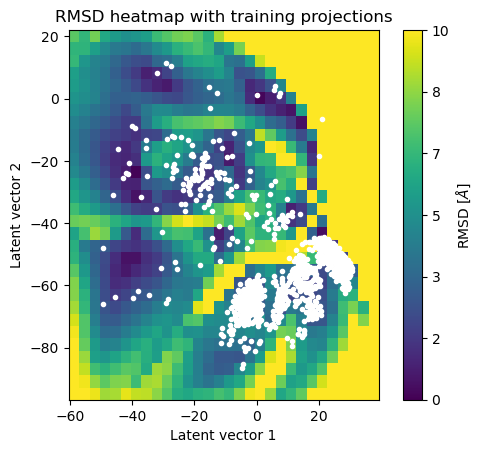

In [3]:
# Need fliplr because heatmap displays data differently from how array stores it
df_z=np.squeeze(np.fliplr(df_z))

# Plot the heatmap
plt.imshow(df_z, cmap='viridis', vmin=0., vmax=10., extent=[np.min(df_x), np.max(df_x), np.min(df_y), np.max(df_y)])

 
# Add scatter plot on top
plt.scatter(x_encoded_train, y_encoded_train, color='white', marker='.')

# Set labels and title
plt.xlabel('Latent vector 1')
plt.ylabel('Latent vector 2')
plt.title('RMSD heatmap with training projections')

# Show the colorbar
cbar=plt.colorbar(label='RMSD [$\AA$]')
cbar.set_ticks(np.linspace(0, 1, 7))
cbar.set_ticklabels([f'{i:.0f}' for i in np.linspace(0, 10, 7)])  # Format tick labels as integers
plt.show()

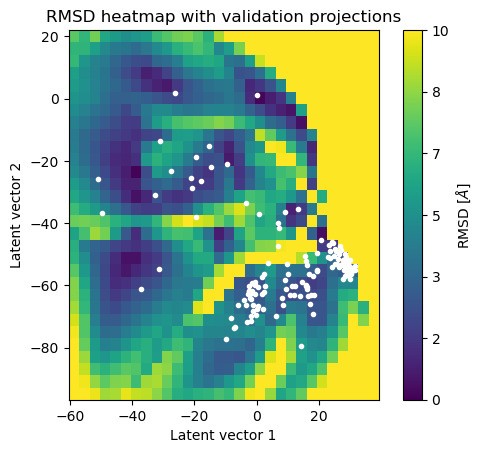

In [4]:
plt.imshow(df_z, cmap='viridis', vmin=0., vmax=10., extent=[np.min(df_x), np.max(df_x), np.min(df_y), np.max(df_y)])

 
# Add scatter plot on top
plt.scatter(x_encoded_valid, y_encoded_valid, color='white', marker='.')

# Set labels and title
plt.xlabel('Latent vector 1')
plt.ylabel('Latent vector 2')
plt.title('RMSD heatmap with validation projections')

# Show the colorbar
cbar=plt.colorbar(label='RMSD [$\AA$]')
cbar.set_ticks(np.linspace(0, 1, 7))
cbar.set_ticklabels([f'{i:.0f}' for i in np.linspace(0, 10, 7)])  # Format tick labels as integers
plt.show()

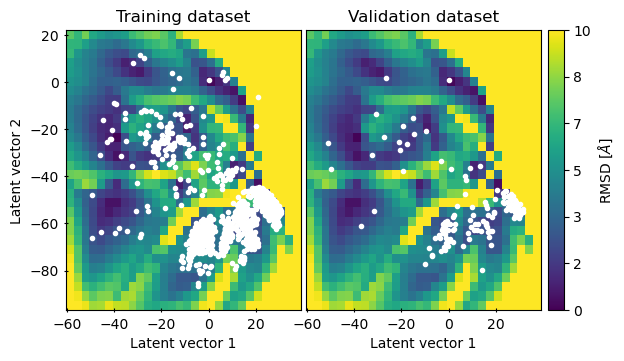

In [9]:
fig = plt.figure(figsize=(8, 8))

# Create 2 square subplots 
# Specify the position of the subplots in the figure
ax1 = fig.add_axes([0.1, 0.1, 0.35, 0.35])
ax1.imshow(df_z, cmap='viridis', vmin=0., vmax=10., extent=[np.min(df_x), np.max(df_x), np.min(df_y), np.max(df_y)])
ax1.scatter(x_encoded_train, y_encoded_train, color='white', marker='.')

ax2 = fig.add_axes([0.4, 0.1, 0.35, 0.35])
im = ax2.imshow(df_z, cmap='viridis', vmin=0., vmax=10., extent=[np.min(df_x), np.max(df_x), np.min(df_y), np.max(df_y)])
ax2.scatter(x_encoded_valid, y_encoded_valid, color='white', marker='.')

# Create 2 vertical colorbar axes for the subplots
# Specify the position of the colorbar axes relative to the subplots
cbar_ax2 = fig.add_axes([0.73,0.1,0.02,0.35])
cbar_ax2.tick_params(left=False, labelleft=False, right=True, labelright=True, labelbottom=False, bottom = False)

# Create colorbar
cbar = fig.colorbar(im, cax=cbar_ax2, label='RMSD [$\AA$]')
cbar_ticks = np.linspace(0, 10, 7)
cbar.set_ticks(cbar_ticks)
cbar.set_ticklabels([f'{tick:.0f}' for tick in cbar_ticks])

# Set axes properties
ax1.tick_params(direction='inout', labelbottom=True, top=False, bottom=True)
ax2.tick_params(direction='inout', labelbottom=True, top=False, bottom=True, left=False, labelleft=False)

# Set labels
ax1.set_xlabel('Latent vector 1')
ax1.set_ylabel('Latent vector 2')
ax2.set_xlabel('Latent vector 1')

#Set titles
ax1.set_title('Training dataset')
ax2.set_title('Validation dataset')

plt.savefig('RMSDlandscapesOnePlot.png', dpi=300, bbox_inches='tight')
plt.show()